In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



In [8]:
BATCH_SIZE = 32
IMAGE_SIZE = 180
CHANNELS = 3
train_val_dir = r"C:\Users\MANICKA MEENAKSHI.S\Downloads\archive (6)\PotatoPlants"
test_dir = r"C:\Users\MANICKA MEENAKSHI.S\Downloads\archive (6)\PlantVillage\PlantVillage"

In [17]:
import os
data = []

for class_name in os.listdir(train_val_dir):
    class_path = os.path.join(train_val_dir, class_name)
    
 
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            data.append((img_path, class_name)) 


df = pd.DataFrame(data, columns=['image_path', 'label'])


print(df.head())


                                          image_path                  label
0  C:\Users\MANICKA MEENAKSHI.S\Downloads\archive...  Potato___Early_blight
1  C:\Users\MANICKA MEENAKSHI.S\Downloads\archive...  Potato___Early_blight
2  C:\Users\MANICKA MEENAKSHI.S\Downloads\archive...  Potato___Early_blight
3  C:\Users\MANICKA MEENAKSHI.S\Downloads\archive...  Potato___Early_blight
4  C:\Users\MANICKA MEENAKSHI.S\Downloads\archive...  Potato___Early_blight


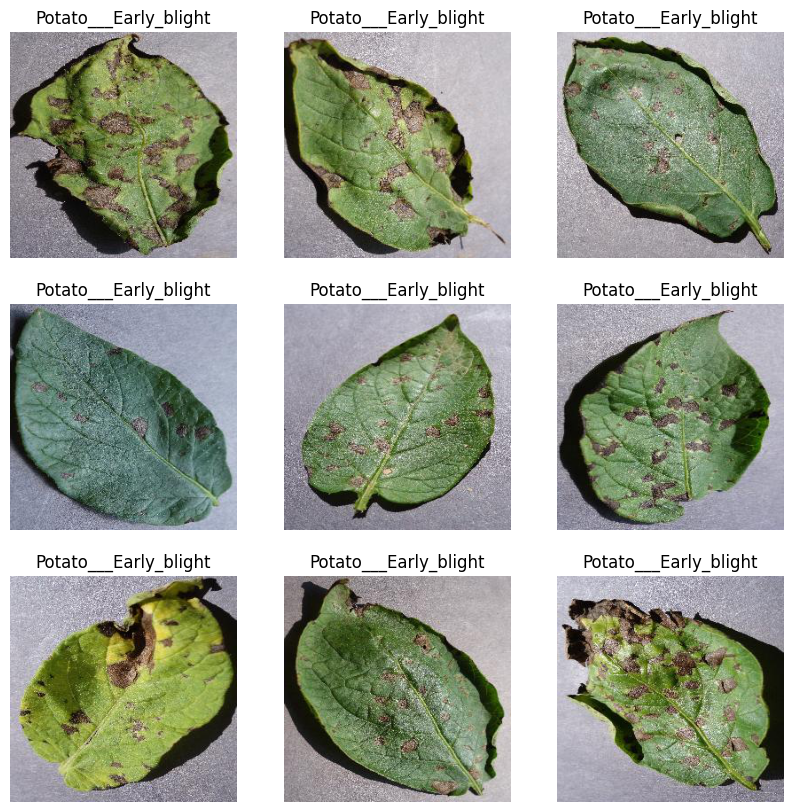

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


class_names = df['label'].unique()

plt.figure(figsize=(10, 10))


for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img_path = df['image_path'].iloc[i]
    img = mpimg.imread(img_path)  
    plt.imshow(img)
    plt.title(df['label'].iloc[i])
    plt.axis("off")

plt.show()


In [66]:
import seaborn as sns
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [25]:
import os
data = []
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            data.append((img_path, class_name)) 


test = pd.DataFrame(data, columns=['image_path', 'label'])
print(test.head())


                                          image_path                  label
0  C:\Users\MANICKA MEENAKSHI.S\Downloads\archive...  Potato___Early_blight
1  C:\Users\MANICKA MEENAKSHI.S\Downloads\archive...  Potato___Early_blight
2  C:\Users\MANICKA MEENAKSHI.S\Downloads\archive...  Potato___Early_blight
3  C:\Users\MANICKA MEENAKSHI.S\Downloads\archive...  Potato___Early_blight
4  C:\Users\MANICKA MEENAKSHI.S\Downloads\archive...  Potato___Early_blight


In [32]:
from sklearn.model_selection import train_test_split

def get_dataset_partitions(df, train_split=0.8, val_split=0.1, test_split=0.1):
    assert (train_split + val_split + test_split) == 1
    train_df, temp_df = train_test_split(df, test_size=(1 - train_split), random_state=12)
    val_size = val_split / (val_split + test_split)
    val_df, test_df = train_test_split(temp_df, test_size=(1 - val_size), random_state=12)
    
    return train_df, val_df, test_df


train_df, val_df, test_df = get_dataset_partitions(df)


print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


Train set size: 1721
Validation set size: 215
Test set size: 216


In [36]:
from tensorflow.keras import layers, Sequential
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,  
    x_col='image_path', 
    y_col='label',
    target_size=(180, 180),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 1721 validated image filenames belonging to 3 classes.


In [43]:
print(train_df.columns)


Index(['image_path', 'label'], dtype='object')


In [48]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


BATCH_SIZE = 32


datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)


train_generator = datagen_train.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col='image_path',
    y_col='label',
    target_size=(180, 180),
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

validation_generator = datagen_val.flow_from_dataframe(
    dataframe=val_df,
    directory=None,
    x_col='image_path',
    y_col='label',
    target_size=(180, 180),
    batch_size=BATCH_SIZE,
    class_mode='sparse' 
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') 
])

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)


Found 1721 validated image filenames belonging to 3 classes.
Found 215 validated image filenames belonging to 3 classes.


C:\Users\MANICKA MEENAKSHI.S\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\MANICKA MEENAKSHI.S\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6002 - loss: 0.9188 - val_accuracy: 0.8651 - val_loss: 0.3309
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8935 - loss: 0.2885 - val_accuracy: 0.7535 - val_loss: 0.4649
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9058 - loss: 0.2544 - val_accuracy: 0.8512 - val_loss: 0.3337
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9004 - loss: 0.2805 - val_accuracy: 0.9581 - val_loss: 0.1029
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9661 - loss: 0.0937 - val_accuracy: 0.9442 - val_loss: 0.1457
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9786 - loss: 0.0626 - val_accuracy: 0.9302 - val_loss: 0.1690
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9814 - loss: 0.0537 - val_accuracy: 0.9581 - val_loss: 0.0988
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9903 - loss: 0.0420 - val_accuracy: 0.9674 - val_loss: 0.0807
Epo

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_test = ImageDataGenerator(rescale=1./255)


test_generator = datagen_test.flow_from_dataframe(
    dataframe=test_df,
    directory=None,
    x_col='image_path',
    y_col='label',
    target_size=(180, 180),
    batch_size=BATCH_SIZE,
    class_mode='sparse'  
)
score = model.evaluate(test_generator, verbose=1)

print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")


Found 216 validated image filenames belonging to 3 classes.


C:\Users\MANICKA MEENAKSHI.S\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - accuracy: 0.9645 - loss: 0.1339
Test Loss: 0.17255938053131104
Test Accuracy: 0.9583333134651184


In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [53]:

datagen_val = ImageDataGenerator(rescale=1./255)

val_generator = datagen_val.flow_from_dataframe(
    dataframe=val_df,
    directory=None,
    x_col='image_path',
    y_col='label',
    target_size=(180, 180),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
predictions = model.predict(val_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

#print(predictions)
#print(predicted_classes)


Found 215 validated image filenames belonging to 3 classes.


C:\Users\MANICKA MEENAKSHI.S\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step
[[2.89817952e-04 9.94333982e-01 5.37624117e-03]
 [1.00000000e+00 1.25434333e-11 7.82352386e-18]
 [8.37998826e-08 9.99999881e-01 3.39474959e-09]
 [9.99262750e-01 7.37285649e-04 1.90554495e-12]
 [6.63156925e-08 9.99999881e-01 7.49225215e-09]
 [9.99489069e-01 5.05559612e-04 5.39534358e-06]
 [2.76853348e-06 9.99994874e-01 2.30076967e-06]
 [3.03665888e-06 9.99996424e-01 5.54135340e-07]
 [6.07621314e-06 9.99993801e-01 1.01974045e-07]
 [3.52587178e-03 9.96465087e-01 8.99530278e-06]
 [8.53969553e-08 9.99999762e-01 1.80824856e-07]
 [1.72557593e-05 7.16304541e-01 2.83678234e-01]
 [2.84075355e-07 9.99999762e-01 1.12099370e-08]
 [1.96901055e-07 2.25164220e-02 9.77483392e-01]
 [2.56098778e-04 9.99742210e-01 1.70564215e-06]
 [1.91582076e-04 9.34476972e-01 6.53314218e-02]
 [9.99994040e-01 5.93455934e-06 7.05669023e-10]
 [1.00000000e+00 9.85497639e-09 5.26800537e-15]
 [1.00000000e+00 1.30392959e-08 4.06682710e-14]
 [3.60619447e-06 9.98607099e-01 1.38931058e-03]
 

Found 216 validated image filenames belonging to 3 classes.
First image shape: (180, 180, 3)
First label: [1. 0. 0.]


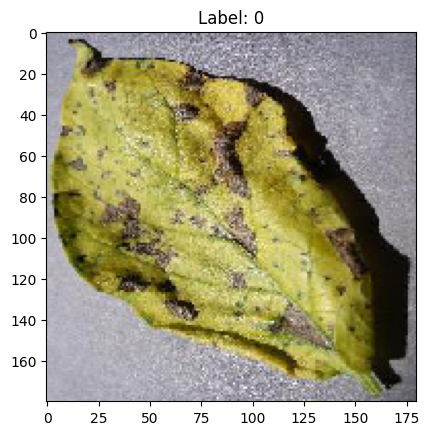

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
datagen_test = ImageDataGenerator(rescale=1./255)
test_generator = datagen_test.flow_from_dataframe(
    dataframe=test_df,
    directory=None,
    x_col='image_path',
    y_col='label',
    target_size=(180, 180),
    batch_size=BATCH_SIZE,
    class_mode='categorical' 
)
images_batch, labels_batch = next(test_generator)
first_image = images_batch[0]
first_label = labels_batch[0]

print(f"First image shape: {first_image.shape}")
print(f"First label: {first_label}")
import matplotlib.pyplot as plt

plt.imshow(first_image)
plt.title(f"Label: {np.argmax(first_label)}")
plt.show()


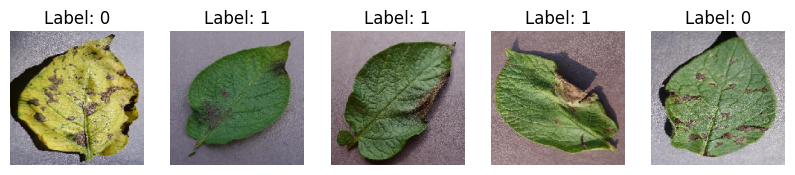

In [70]:
import matplotlib.pyplot as plt


def display_batch(generator, num_images=5):
    
    images_batch, labels_batch = next(generator)

   
    num_images = min(num_images, len(images_batch))


    plt.figure(figsize=(10, 10))
    
  
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images_batch[i])
        plt.title(f"Label: {np.argmax(labels_batch[i])}")
        plt.axis('off')
    
    plt.show()
display_batch(test_generator, num_images=5)


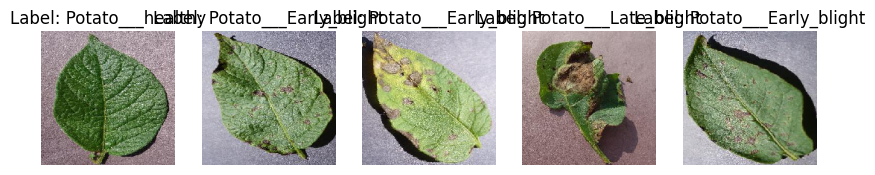

In [61]:
import matplotlib.pyplot as plt
import numpy as np
class_labels = list(train_generator.class_indices.keys())
def display_batch_with_labels(generator, num_images=5):
    images_batch, labels_batch = next(generator)

  
    num_images = min(num_images, len(images_batch))

  
    plt.figure(figsize=(10, 10))
    

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images_batch[i])
        plt.title(f"Label: {class_labels[np.argmax(labels_batch[i])]}")  # Use class_labels here
        plt.axis('off')
    
    plt.show()


display_batch_with_labels(test_generator, num_images=5)


In [62]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


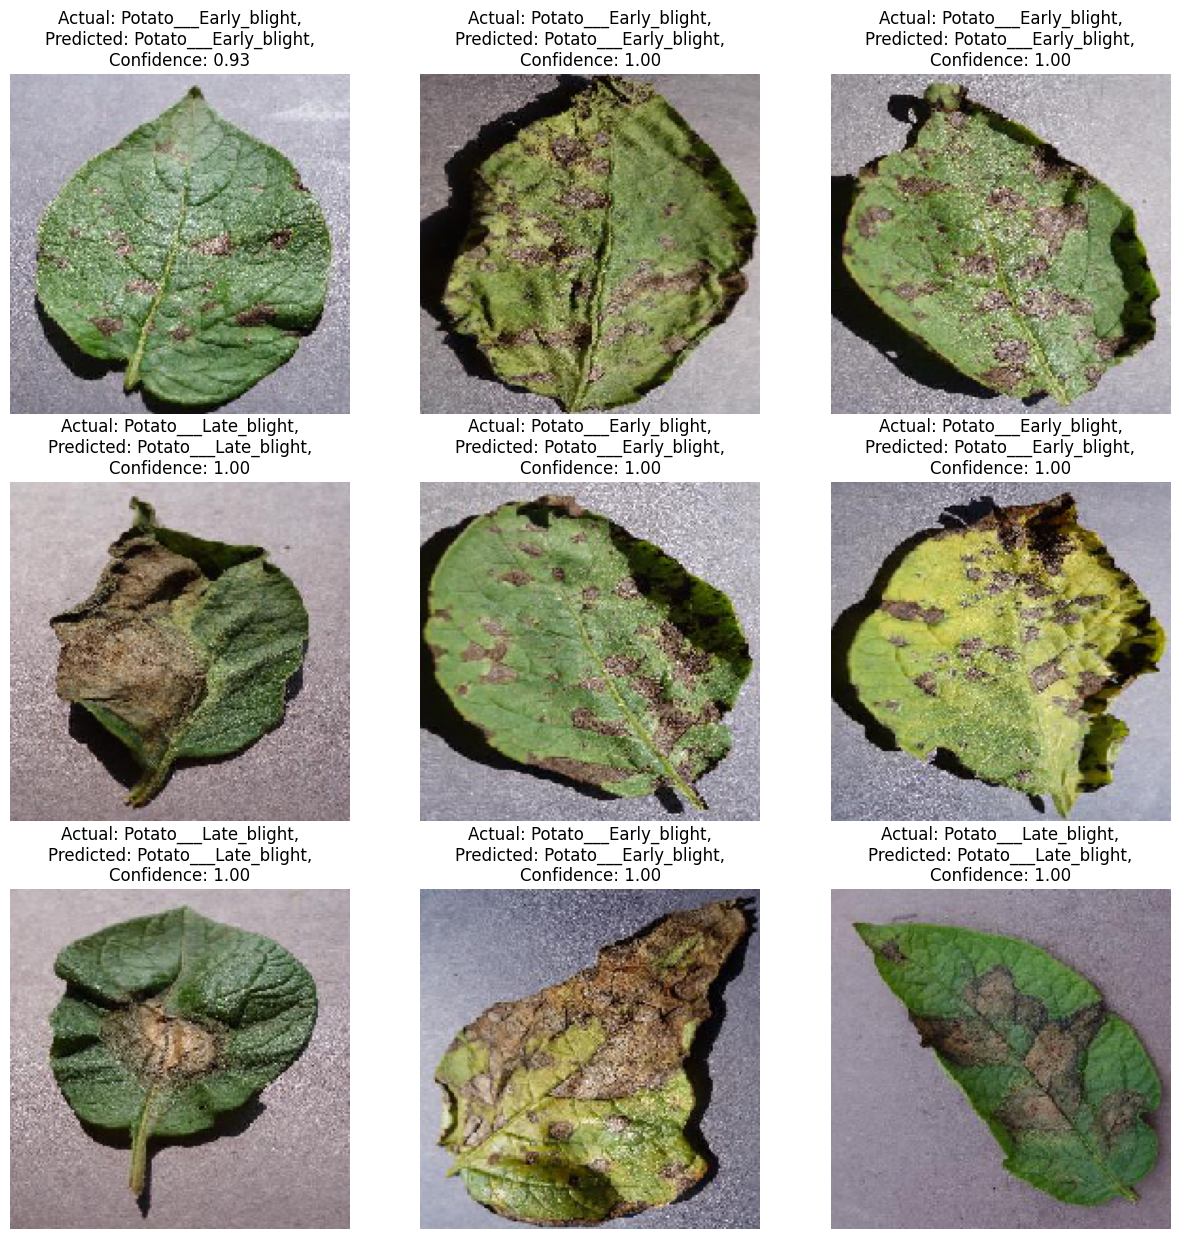

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


class_names = list(train_generator.class_indices.keys())


def predict(model, image):
    # Preprocess image if needed
    image = np.expand_dims(image, axis=0) 
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    return class_names[predicted_class], confidence


plt.figure(figsize=(15, 15))
for images_batch, labels_batch in test_generator:
    for i in range(min(9, len(images_batch))):  
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images_batch[i])
        
      
        predicted_class, confidence = predict(model, images_batch[i])
        
        actual_class = class_names[np.argmax(labels_batch[i])]
        

        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence:.2f}")
        plt.axis("off")
    
    plt.show()
    break  
